In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [15]:
data = pd.read_csv(r'C:\Users\sures\Downloads\Loan Prediction dataset\train.csv')

In [16]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [19]:
data.shape

(614, 13)

In [21]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [12]:
data.drop("Loan_ID", axis = 1, inplace = True)

In [13]:
data.isnull().sum()

Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [22]:
#Let's see what the options are in the text columns (the objects)
print('Gender: ' + str(data['Gender'].unique()))
print('Married: ' + str(data['Married'].unique()))
print('Dependents: '+ str(data['Dependents'].unique()))
print('Education: '+ str(data['Education'].unique()))
print('Self_Employed: '+ str(data['Self_Employed'].unique()))
print('Property_Area: '+ str(data['Property_Area'].unique()))

Gender: ['Male' 'Female' nan]
Married: ['No' 'Yes' nan]
Dependents: ['0' '1' '2' '3+' nan]
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes' nan]
Property_Area: ['Urban' 'Rural' 'Semiurban']


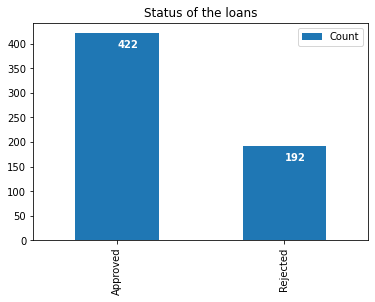

In [23]:
#number of loans approved and rejected
Approved = data[data['Loan_Status'] == 'Y']['Loan_Status'].count()
Rejected = data[data['Loan_Status'] == 'N']['Loan_Status'].count()

#now let's put these results in a dataframe to visualize them
df = {"Count" : [Approved, Rejected]} #this is for the legend to be clear that it is counts
Status = pd.DataFrame(df, index=["Approved", "Rejected"])

#let's visualize the bar plot
ax = Status.plot(kind = 'bar', title = 'Status of the loans')

#here I want to add the labels to the bars and to make this more clear I've made them white of color
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() - 30), color = 'white', fontweight = 'bold')

In [24]:
#let's see the percentages of the status:
print('The percentage of approved loans : %.2f' % (data['Loan_Status'].value_counts()[0] / len(data)))
print('The percentage of rejected loans : %.2f' % (data['Loan_Status'].value_counts()[1] / len(data)))

The percentage of approved loans : 0.69
The percentage of rejected loans : 0.31


In [25]:
#let's look in what columns there are missing values 
data.isnull().sum().sort_values(ascending = False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

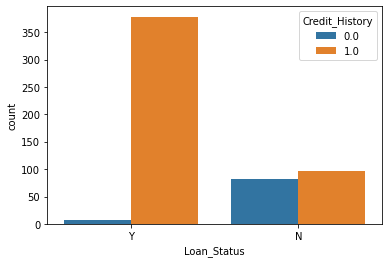

In [26]:
#Let's look at the credit history in more detail to see what the best way is to handle these missing values
#I will use seaborn for the visualization
sns.countplot(data['Loan_Status'],hue=data['Credit_History'])

In [27]:
print(pd.crosstab(data['Credit_History'],data['Loan_Status']))

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


In [28]:
print('The percentage of credit history yes : %.2f' % (data['Credit_History'].value_counts()[1] / len(data)))
print('The percentage of credit history no : %.2f' % (data['Credit_History'].value_counts()[0] / len(data)))

The percentage of credit history yes : 0.77
The percentage of credit history no : 0.14


In [29]:
data['Credit_History'] = data['Credit_History'].fillna(1)
data.isnull().sum().sort_values(ascending = False)

Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

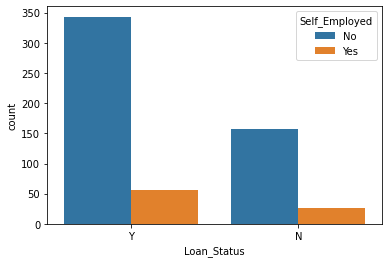

In [30]:
#Continue with Self_Employed
sns.countplot(data['Loan_Status'],hue=data['Self_Employed'])

In [31]:
data['Self_Employed'] = data['Self_Employed'].fillna('No')
data.isnull().sum().sort_values(ascending = False)

LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

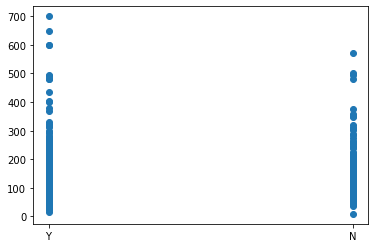

In [32]:
#Continue with LoanAmount, as this is a numeric, thus continous number, I will use a scatterplot to see if there is a pattern / correlation. 
plt.scatter(data['Loan_Status'], data['LoanAmount'])

In [33]:
#As the patterns look similar for yes and no, I will fill the missing values with the mean of the column
data['LoanAmount'] = data['LoanAmount'].fillna( data['LoanAmount'].mean())
data.isnull().sum().sort_values(ascending = False)

Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [34]:
#Let's drop the rest of the missing values:
data.dropna(inplace = True)
data.shape

(573, 13)

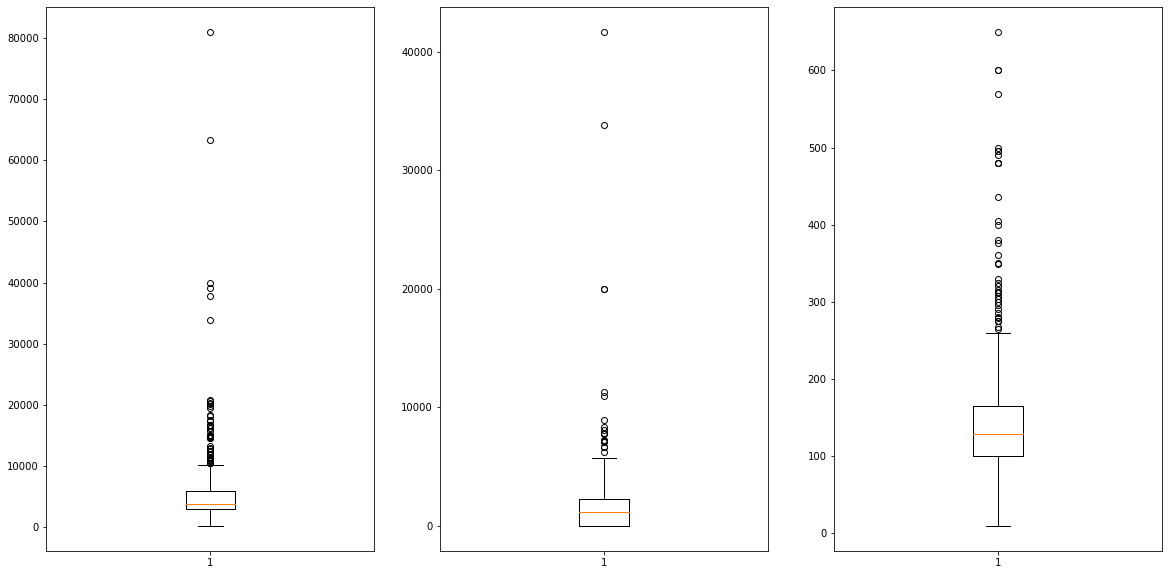

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))
ax1.boxplot(data['ApplicantIncome'])
ax2.boxplot(data['CoapplicantIncome'])
ax3.boxplot(data['LoanAmount'])
plt.show()

In [36]:
outliers = data[data['ApplicantIncome'] > 25000]
outliers.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
183,LP001637,Male,Yes,1,Graduate,No,33846,0.0,260.0,360.0,1.0,Semiurban,N
185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
333,LP002101,Male,Yes,0,Graduate,No,63337,0.0,490.0,180.0,1.0,Urban,Y
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


In [37]:
data = data[data['ApplicantIncome'] < 25000]

In [38]:
outliers = data[data['CoapplicantIncome'] > 25000]
outliers.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
581,LP002893,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,N
600,LP002949,Female,No,3+,Graduate,No,416,41667.0,350.0,180.0,1.0,Urban,N


In [39]:
#As you can see that these are just two rows and the status is not approved, I will remove these two rows for the model. 
data = data[data['CoapplicantIncome'] < 25000]

In [40]:
#First make the target column (Loan_Status) numerical
data['Loan_Status'] = np.where((data['Loan_Status'] == 'Y'), 1, 0)

In [41]:
#Next we will drop the loan_ID column as this will only confuse the model later on
data.drop('Loan_ID', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             565 non-null    object 
 1   Married            565 non-null    object 
 2   Dependents         565 non-null    object 
 3   Education          565 non-null    object 
 4   Self_Employed      565 non-null    object 
 5   ApplicantIncome    565 non-null    int64  
 6   CoapplicantIncome  565 non-null    float64
 7   LoanAmount         565 non-null    float64
 8   Loan_Amount_Term   565 non-null    float64
 9   Credit_History     565 non-null    float64
 10  Property_Area      565 non-null    object 
 11  Loan_Status        565 non-null    int32  
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 55.2+ KB


In [42]:
#Next, make all other columns numerical as well. 
data['Married'] = np.where((data['Married'] == 'Yes'), 1, 0)
data['Gender'] = np.where((data['Gender'] == 'Female'), 1, 0)
data['Education'] = np.where((data['Education'] == 'Graduate'), 1, 0)
data['Self_Employed'] = np.where((data['Self_Employed'] == 'Yes'), 1, 0)
data['Dependents'] = np.where((data['Dependents'] == '0'), 0, 1) 
#I saw that there was no big difference between the number of dependents if there are any. So I made no dependents = 0  and yes dependents = 1

In [43]:
#Lastly I want to change the Property_Area column, but I want to keep all three options. Therefore this I will do differently. 

def f(row):
  if row['Property_Area'] == "Rural":
    val = 1
  elif row['Property_Area'] == "Urban":
    val = 0
  else:
    val = 2
  return val

data['Property_Area'] = data.apply(f, axis=1)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             565 non-null    int32  
 1   Married            565 non-null    int32  
 2   Dependents         565 non-null    int32  
 3   Education          565 non-null    int32  
 4   Self_Employed      565 non-null    int32  
 5   ApplicantIncome    565 non-null    int64  
 6   CoapplicantIncome  565 non-null    float64
 7   LoanAmount         565 non-null    float64
 8   Loan_Amount_Term   565 non-null    float64
 9   Credit_History     565 non-null    float64
 10  Property_Area      565 non-null    int64  
 11  Loan_Status        565 non-null    int32  
dtypes: float64(4), int32(6), int64(2)
memory usage: 44.1 KB


In [45]:
X = data.iloc[:,0:11]  #independent columns 
y = data.iloc[:,-1]    #target column = Status of the loan

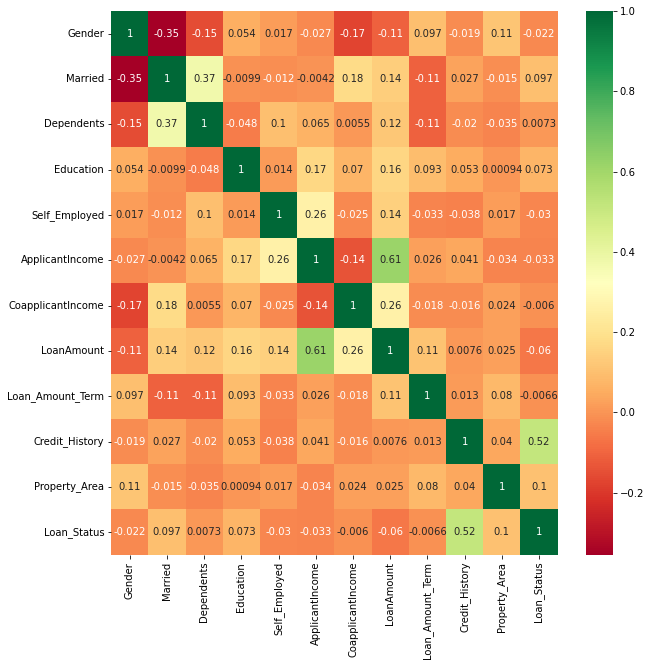

In [48]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))

#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [49]:
from sklearn.model_selection import train_test_split

#First try with the 4 most important features
X_4 = data[['Credit_History', 'CoapplicantIncome', 'Married', 'Property_Area']] #independent columns chosen 
y = data.iloc[:,-1]    #target column = Status of the loan

#I want to withhold 30 % of the trainset to perform the tests
X_train, X_test, y_train, y_test= train_test_split(X_4,y, test_size=0.3 , random_state = 25)

In [50]:
print('Shape of X_train is: ', X_train.shape)
print('Shape of X_test is: ', X_test.shape)
print('Shape of Y_train is: ', y_train.shape)
print('Shape of y_test is: ', y_test.shape)

Shape of X_train is:  (395, 4)
Shape of X_test is:  (170, 4)
Shape of Y_train is:  (395,)
Shape of y_test is:  (170,)


In [51]:
#Let's confirm that we use the same number of status approved versus disapproved in the test and train data.
#As approved is 1, this can be counted easily. 
print('The % approved status versus not approved in original_data :',data['Loan_Status'].value_counts().values/ len(data))
print('\nThe % approved status versus not approved in y_train :',y_train.value_counts().values/ len(y_train))
print('\nThe % approved status versus not approved in in y_test :',y_test.value_counts().values/ len(y_test))

The % approved status versus not approved in original_data : [0.69734513 0.30265487]

The % approved status versus not approved in y_train : [0.68860759 0.31139241]

The % approved status versus not approved in in y_test : [0.71764706 0.28235294]


In [57]:
import sklearn.metrics as sklm
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('DETAILS ACCURACY, PRECISION AND RECALL')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

In [55]:
# logistic_regression model
from sklearn.linear_model import LogisticRegression
logistic_mod = LogisticRegression(C = 1.0, class_weight = {0:0.45, 1:0.55}) 
logistic_mod.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.45, 1: 0.55})

In [58]:
#Check the performance of the logistic regression model
probabilities = logistic_mod.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.3) 

                 Confusion matrix
                 Score positive    Score negative
Actual positive        18                30
Actual negative         1               121

DETAILS ACCURACY, PRECISION AND RECALL
Accuracy        0.82
AUC             0.73
Macro precision 0.87
Macro recall    0.68
 
           Positive      Negative
Num case       48           122
Precision    0.95          0.80
Recall       0.38          0.99
F1           0.54          0.89


In [59]:
from sklearn.tree import DecisionTreeClassifier
D_tree = DecisionTreeClassifier(max_depth = 3)
D_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [60]:
prob_D = D_tree.predict_proba(X_test)
print_metrics(y_test, prob_D, 0.3)

                 Confusion matrix
                 Score positive    Score negative
Actual positive        21                27
Actual negative         4               118

DETAILS ACCURACY, PRECISION AND RECALL
Accuracy        0.82
AUC             0.72
Macro precision 0.83
Macro recall    0.70
 
           Positive      Negative
Num case       48           122
Precision    0.84          0.81
Recall       0.44          0.97
F1           0.58          0.88


In [63]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
y_hat=rfc.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score
accuracy=[]
f1=[]
model=[]
accuracy.append(np.round(accuracy_score(y_test,y_hat),2))
f1.append(np.round(f1_score(y_test,y_hat,average='weighted'),2))
model.append('Random Forest')

<AxesSubplot:>

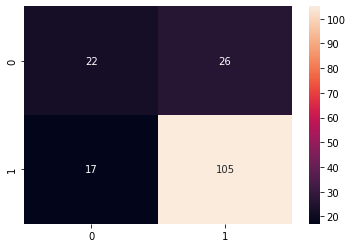

In [67]:
sns.heatmap(confusion_matrix(y_test,y_hat),annot=True,fmt='.0f')

In [ ]:
#ref: https://www.kaggle.com/code/renatevankempen/predicting-loan-egibility/notebook